In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import os

# Correlation Function

In [2]:
def correlation(filename, baseline):
        
    """
    correlation equation that compares one dataset to another
    pass in baseline profile (either first or last year in data set)
    pass in the filename for each subsequent (or former) year's data
    compare each subsequent (or former) year data with baseline profile
    if baseline is first year, then first correlation = 1
    if baseline is last year, then last correlation = 1
    range of values should largely fall between 0 and 1
    EX) two datasets, y and y'
        the correlation is the sum of y times y' divided by the squareroot
        of the sum of y squared and y' squared multiplied together
    """
    
    data_profile = np.loadtxt(filename)
    bv_profile = data_profile[:,3]
    dcorr = (np.sum(baseline*bv_profile))/(sqrt(np.sum(baseline**2)*np.sum(bv_profile**2)))
    
    return dcorr

# Plot Correlation Function

In [3]:
def plot_correlation(timespan, path, correlations):

    # overly complicated way to extract the last year in the data set from the filename
    # converts from string to int to be used for length of x-axis (Myr)
    timespan = timespan.rsplit('_', 1)
    timespan = timespan[0]
    timespan = timespan.rsplit('_', 1)[-1]
    timespan = timespan.replace('Myr', "")
    timespan = timespan.lstrip("0")
    timespan = int(timespan)

    # extract plot name from basename of directory path 
    plt_name = os.path.basename(path)

    # create x-axis value, end point is from the last year of data set extracted
    # from filename above, then split range into an eqaul number of values as 
    # the correlation values (the y axis)
    t = np.linspace(0,timespan,len(correlations))

    # plot correlation values against time (Myr)
    plt.xlabel("Time (Myr)")
    plt.ylabel("Correlation")
    plt.scatter(t, correlations, marker='+', c="k", s=20, linewidths=0.5)
    plt.title(plt_name)
    plt.minorticks_on()
    plt.tight_layout()
    plt.tick_params(which='both', direction='in', top=True, right=True, labelbottom = True, bottom = True)
    plt.savefig('Correlation_' + str(plt_name) + '.png', dpi = 300, facecolor=(1, 1, 1))

# Data Set Analysis Loop - Correlate and Plot 

In [ ]:
# enter you dataset to update directory to inputed data set
data_set = input("Enter Data Set: ")
directory = '/Users/nmcgregor/Documents/BaltisVallis/cedric_topo_data/' + data_set

#initalize arrays 
corr_values = []
files = []

# builds list of filenames in directory and sorts them 
for filename in os.listdir(directory):
    if filename.endswith(".llt.dat"):        
        file = os.path.join(directory, filename)
        files.append(file)
        files.sort()

# baseline BV profile (starting point to which all other BV profiles will be correlated)
data_base = np.loadtxt(files[-1])
bv_base = data_base[:,3]    

# iterate over all profiles, calculate correlation between baseline BV profile
# and each other profile, pass correlations to array
for i in files:
    corr = correlation(i, bv_base)
    corr_values.append(corr)

# takes last element in files list (last year) and splits filename
# to be used later to determine length of x-axis (Myr) 
x_len = files[-1].rsplit('/', 1)[1]
plot_correlation(x_len, directory, corr_values)

# Haversine Formula Function

In [12]:
def haversine(lon1, lat1, lon2, lat2):
    
    """
    Calculate the great circle distance in meters between two points 
    on Venus (lat and lon specified in decimal degrees)
    """
    
    r = 6051.8e3 # Radius of Venus in meters. Determines return value units. From NASA Venus sheet.

    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2]) 
        
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * r * asin(sqrt(a)) 
    return c

# Calculate distance from single data set

In [19]:
"""
for each point, calculate distance to next point and sum
"""

# enter you dataset to update directory to inputed data set
data_set = input("Enter Data Set: ")
data = '/Users/nmcgregor/Documents/BaltisVallis/cedric_topo_data/' + data_set

# Variables
lat = data[:,0]; lon = data[:,1]; bv = data[:,3]; 
i = 0 # start value
sum = 0 # start value

# loop that iterates over lat and lon values, passes them to haversine function
# which returns the distance from one point to the next, and continues to calculate
# the distance from point 1 to 2, 3 to 4, 4 to 5 and so on while summing them to
# calculate total distance of BV
# len(data)-1 needed to end loop at end of array since incremeting by one each step
for i in range(len(data)-1):
    sum += haversine(lon[i], lat[i], lon[i+1], lat[i+1])

# Plot BV elevation values over its distance

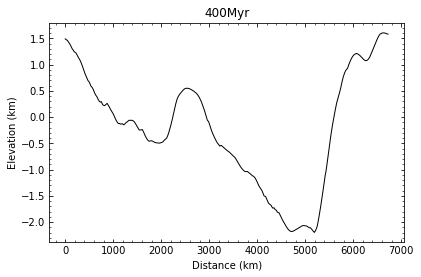

In [30]:
"""
plots BV elevation interpolated from grid values of Cedric's data (topography data)
against length of BV 
"""

# x values array needs to have same # of elements as BV elevation values
# sum is divided by 1e3 so units are km 
dist = np.linspace(0,sum/1e3,len(data))

plt.xlabel("Distance (km)")
plt.ylabel("Elevation (km)")
plt.plot(dist,bv/1e3,"k-",linewidth=1)
plt.title("400Myr")
plt.minorticks_on()
plt.tight_layout()
plt.tick_params(which='both', direction='in', top=True, right=True, labelbottom = True, bottom = True)
plt.savefig('DT_Newtopo3full_00400Myr_00290.txt.llt.dat.png', dpi = 300, facecolor=(1, 1, 1))

In [24]:
sum/1e3

6725.92066409986